#### 1. Data Exploration (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

##### a. Load the Dataset

In [2]:
data=pd.read_csv("C:\ExcelR\Assignments data\Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### b. Features & Summary Stats

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### c. Visualizations

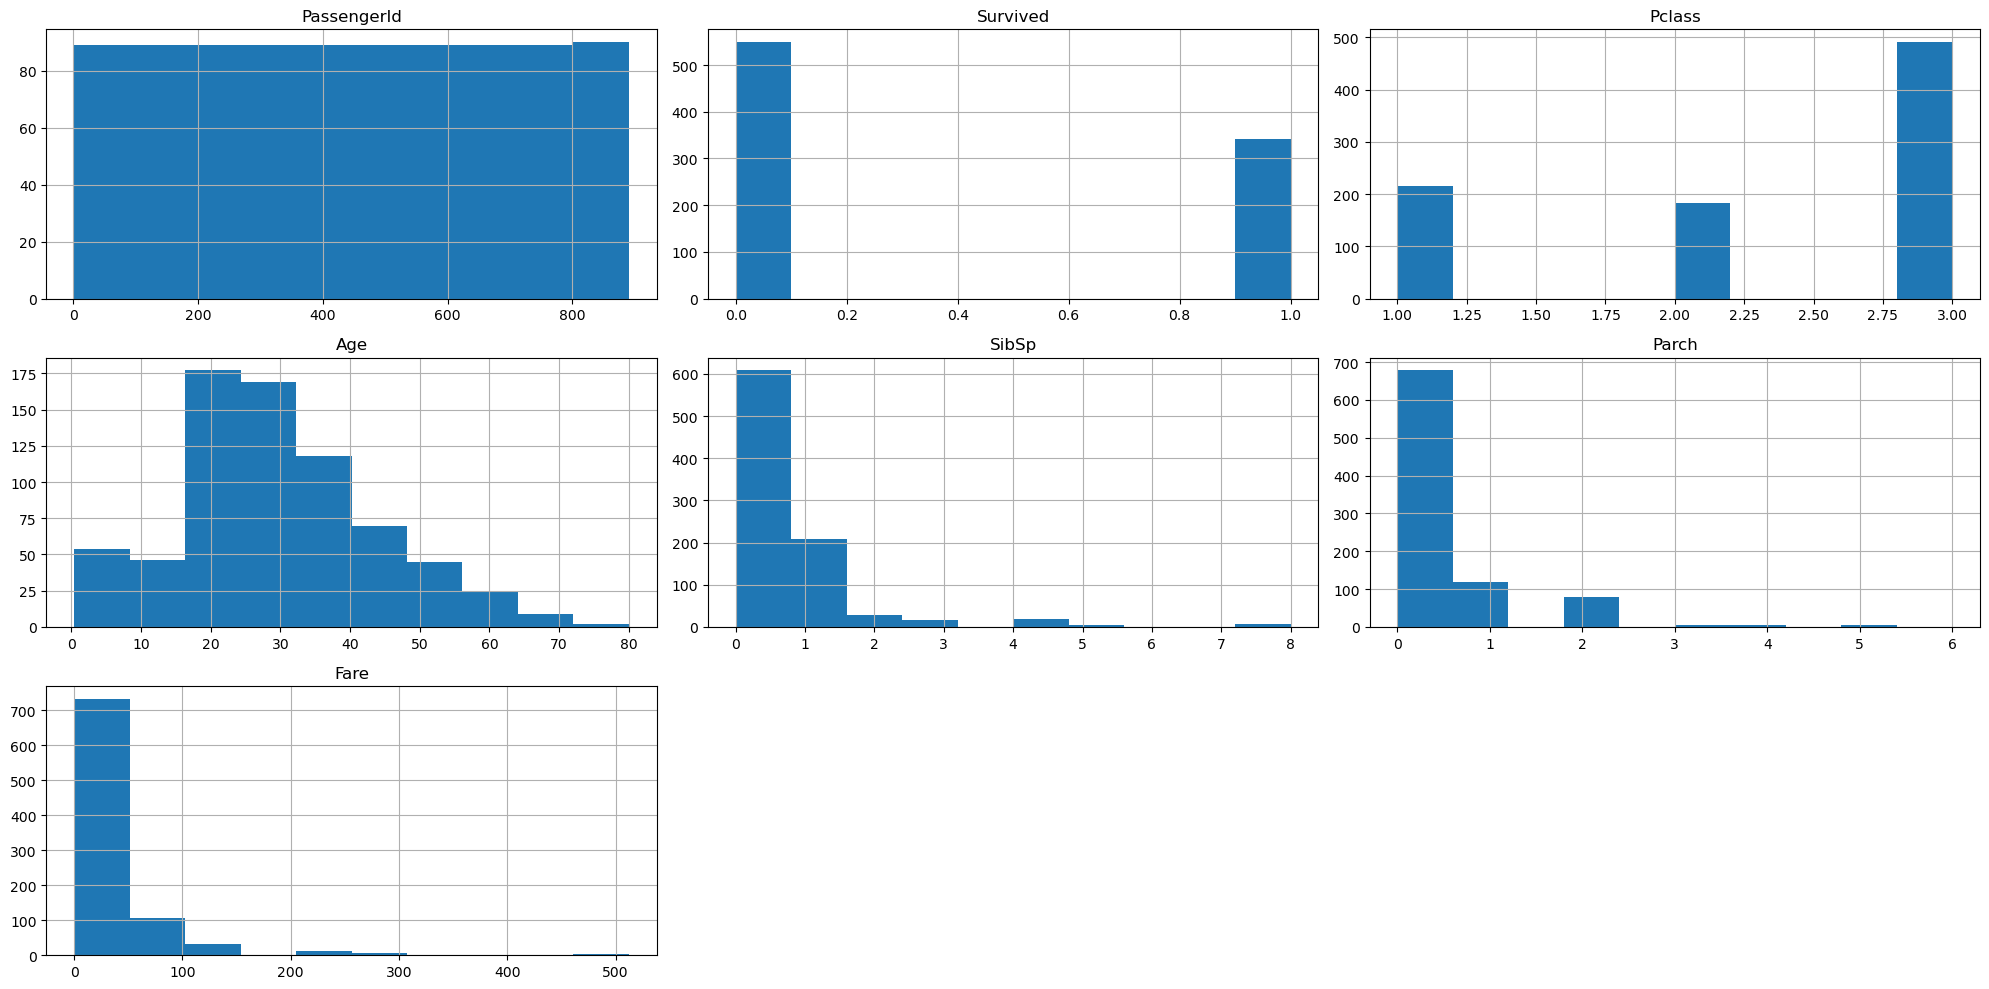

In [5]:
data.hist(figsize=(20,10))
plt.tight_layout()

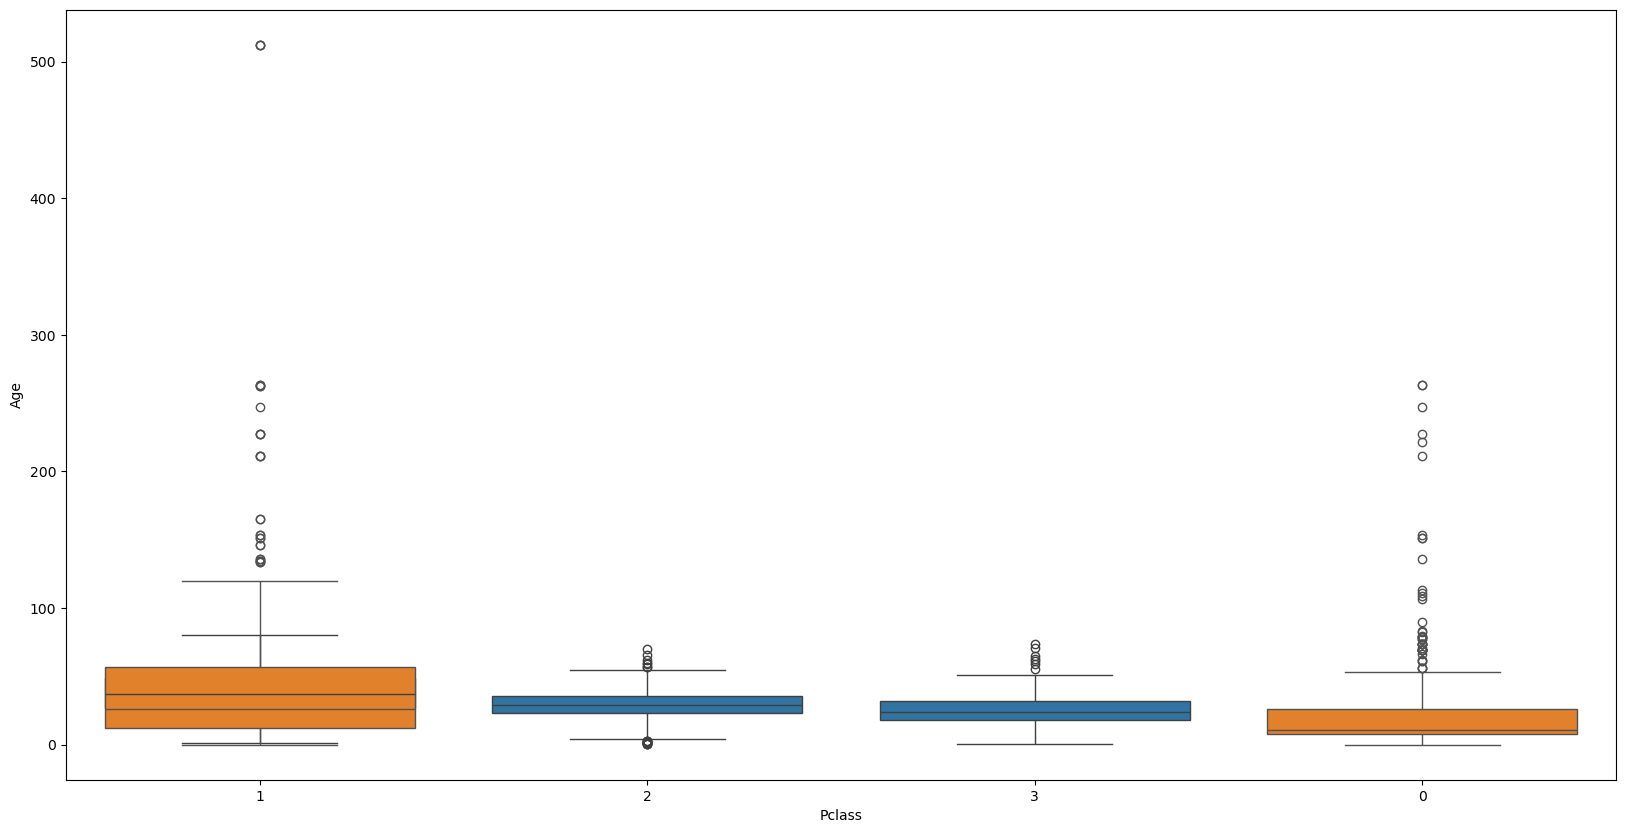

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=data)
sns.boxplot(x='Survived',y='Fare',data=data)
plt.show()

<Axes: ylabel='Age'>

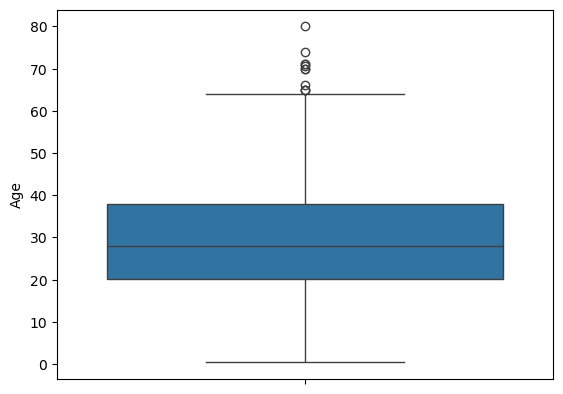

In [7]:
sns.boxplot(data['Age'])

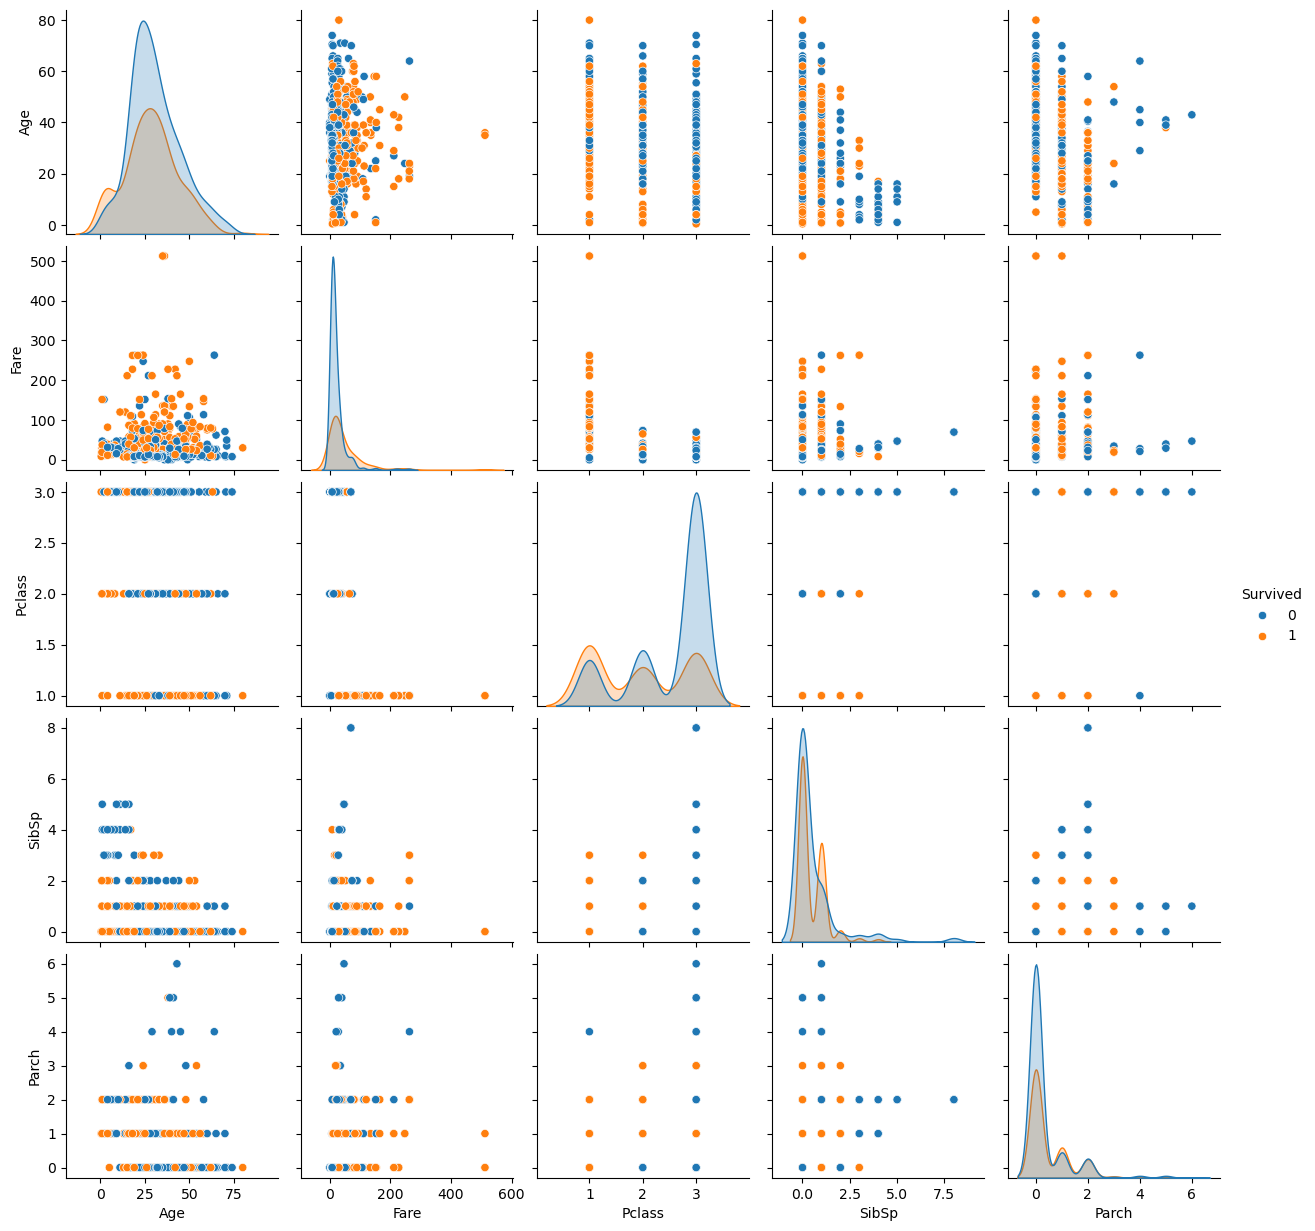

In [8]:
sns.pairplot(data[['Survived','Age','Fare','Pclass','SibSp','Parch','Sex']],hue='Survived')
# basicaly hue is the feature which we want to find by seeing the vesualization
# here we can able to find the survival based on other features

<Axes: xlabel='Age', ylabel='Fare'>

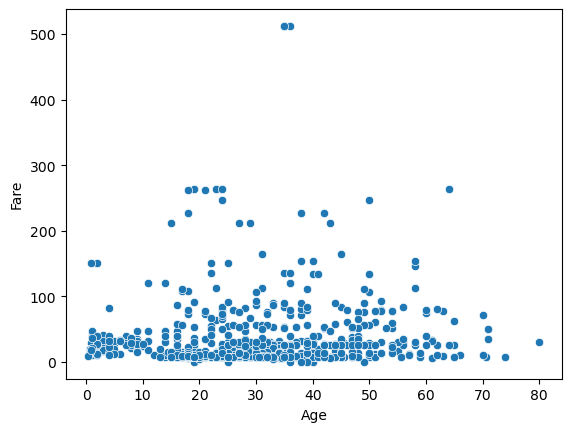

In [9]:
sns.scatterplot(data,x='Age',y='Fare')

#### 2. Data Preprocessing

##### a. Handle Missing Values

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Imputation of Null Values
import warnings
warnings.filterwarnings('ignore')
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data.drop(columns=['Cabin','Ticket','Name','PassengerId'],inplace=True)

##### b. Encode Categorical Variables

In [12]:
data.Embarked.unique() 

array(['S', 'C', 'Q'], dtype=object)

In [13]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)

#### 3. Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


#### 4. Model Evaluation

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC Score: 0.8826254826254826


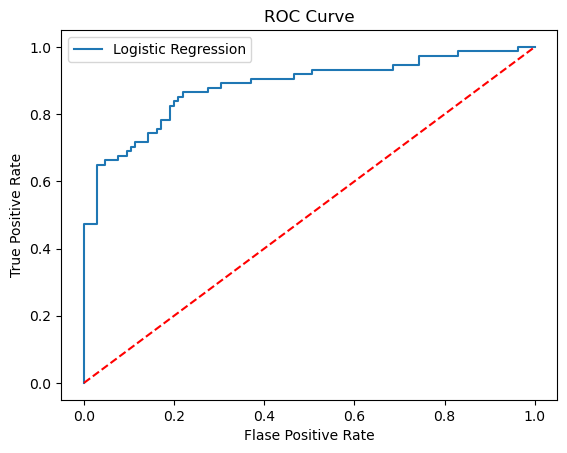

In [16]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print('ROC-AUC Score:',roc_auc_score(y_test,y_prob))

#ROC Curve
fpr,tpr,_=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
model.score(X,y)

0.8024691358024691

In [18]:
model.coef_


array([[-9.38085542e-01,  2.59028085e+00, -3.05582326e-02,
        -2.95132248e-01, -1.07661417e-01,  2.57661281e-03,
        -1.12360514e-01, -3.99498780e-01]])

In [19]:
model.coef_[0]

array([-9.38085542e-01,  2.59028085e+00, -3.05582326e-02, -2.95132248e-01,
       -1.07661417e-01,  2.57661281e-03, -1.12360514e-01, -3.99498780e-01])

In [20]:
coefficients=pd.DataFrame({'Feature':X.columns,'Coefficient':model.coef_[0]})
print(coefficients.sort_values(by='Coefficient',ascending=False))
#  positive coefficient - increases survival probability
#  negetive coefficient - decreases survival probability

      Feature  Coefficient
1         Sex     2.590281
5        Fare     0.002577
2         Age    -0.030558
4       Parch    -0.107661
6  Embarked_Q    -0.112361
3       SibSp    -0.295132
7  Embarked_S    -0.399499
0      Pclass    -0.938086


##### b. Feature Significance

##### Save the model

In [27]:
import pickle
pickle.dump(model,open('Logistic_Regression_model.pkl','wb'))
# Logistic_Regresssion_model it is the file name
# 'wb' is the w-open the file for writing (overwrite if it exists)  , b-treat the file as binary (not plain text)